### Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [4]:
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Check data (JSON file)

In [6]:
df = pd.read_json('Challenge2_data.json')
df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z)
0,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338


In [7]:
df.columns

Index(['Apparent Magitude (m)', 'Absolute Magnitude (M)', 'Redshift (z)'], dtype='object')

### Rename columns

In [8]:
df.rename(columns = {'Apparent Magitude (m)':'m', 'Absolute Magnitude (M)':'M', 'Redshift (z)':'z'}, inplace = True)
df

,m,M,z
0,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338


### Raw data to numpy array

In [9]:
m = df['m'].to_numpy()
M = df['M'].to_numpy()
z = df['z'].to_numpy()
m, M, z

(array([14.54139124, 16.75612879, 15.82960489, 16.29457481, 13.82909389,
        14.18256872, 16.03907735, 17.13886801, 15.9982508 , 17.91048687,
        15.07466972, 15.16403959, 12.48463919, 15.6016586 , 13.75361766,
        14.50453086, 14.14702991, 16.04484713, 15.19214105]),
 array([-16.33906506, -18.17772989, -16.696145  , -19.5122652 ,
        -19.66575613, -21.24923043, -17.77806262, -17.65633895,
        -19.39765543, -16.93192787, -20.91861571, -18.86686028,
        -23.32220082, -18.32499057, -21.31056846, -18.8092583 ,
        -18.51036467, -20.29101151, -16.31300893]),
 array([0.00367597, 0.02260424, 0.00803785, 0.03635172, 0.01039452,
        0.03358662, 0.01444763, 0.017838  , 0.03048528, 0.02533826,
        0.0301413 , 0.017838  , 0.03255174, 0.01106889, 0.01715899,
        0.0120813 , 0.0060223 , 0.03220702, 0.00401082]))

### Distance modulus 

In [10]:
d = (np.power(10, ((m-M+5)/5))) / 1e6 # pc -> Mpc
d

array([ 15.,  97.,  32., 145.,  50., 122.,  58.,  91., 120.,  93., 158.,
        64., 145.,  61., 103.,  46.,  34., 185.,  20.])

### Recession velocity

In [11]:
c = sp.constants.c / 1e3 # m/s -> km/s
c

299792.458

In [12]:
v = c*z
v

array([ 1102.02717461,  6776.58083794,  2409.68771404, 10897.97009507,
        3116.19957399, 10069.01498452,  4331.29181072,  5347.69673997,
        9139.25737589,  7596.21881549,  9036.13397941,  5347.69673997,
        9758.76560163,  3318.3692583 ,  5144.13548681,  3621.88244544,
        1805.43909677,  9655.42263673,  1202.41314441])

### Plot data

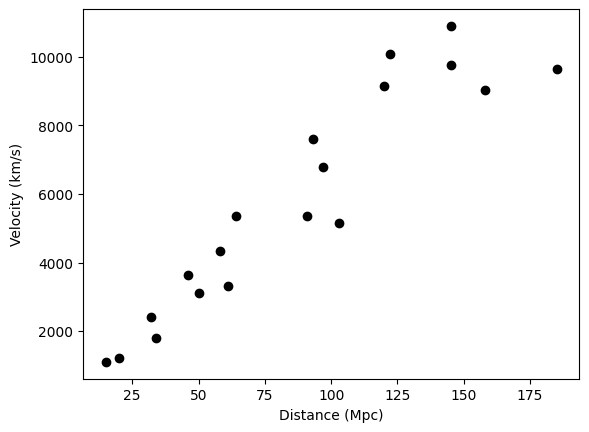

In [13]:
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.scatter(d, v, color='black')

### Linear regression

##### Design model

In [14]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.0001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(d, v, epochs=250)

Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 45602700.0000
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 42025360.0000
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 38736612.0000
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 35713168.0000
Epoch 5/250
1/1 [==============================] - 0s 5ms/step - loss: 32933636.0000
Epoch 6/250
1/1 [==============================] - 0s 4ms/step - loss: 30378342.0000
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 28029200.0000
Epoch 8/250
1/1 [==============================] - 0s 3ms/step - loss: 25869566.0000
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 23884154.0000
Epoch 10/250
1/1 [==============================] - 0s 5ms/step - loss: 22058910.0000
Epoch 11/250
1/1 [==============================] - 0s 5ms/step - loss: 20380922.0000
Epoch 12/250
1/1 [==============================] - 0s 6ms/step 

In [16]:
layer = model.get_layer(index=0)
weights = layer.get_weights()
m, b = weights[0][0][0], weights[1][0]
m, b

(65.57447, 6.1013775)

In [17]:
pred = m * d + b
pred

array([  989.71843529,  6366.82501793,  2104.48443413,  9514.39960289,
        3284.82490349,  8006.18678093,  3809.42066765,  5973.37819481,
        7875.03783989,  6104.52713585, 10366.86771965,  4202.86749077,
        9514.39960289,  4006.14407921,  6760.27184105,  3022.52702141,
        2235.63337517, 12137.37842369,  1317.59078789])

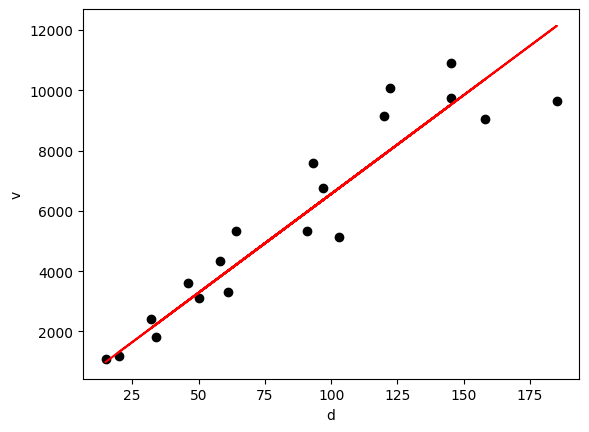

In [18]:
plt.xlabel('d')
plt.ylabel('v')
plt.scatter(d, v, color='black')
plt.plot(d, pred, color='red')

In [19]:
h = m

In [20]:
age_u = ((3.086*1e19/h) / (3.154*1e7)) / 1e9
print('Hubble constant: ', h, 'km/s/Mpc')
print('Age of the universe: ', age_u, 'billion years')

Hubble constant:  65.57447 km/s/Mpc
Age of the universe:  14.92105187178197 billion years
